<a href="https://colab.research.google.com/github/12-Twelvve/12-Twelvve/blob/main/spamClassifier_NLP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [7]:
df.head()
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.target = LabelEncoder().fit_transform(df.target)

In [10]:
df = df.drop_duplicates(keep = 'first')

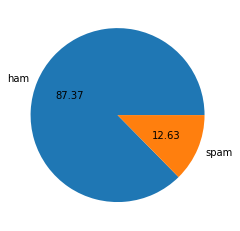

In [11]:
plt.pie(df.target.value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
import seaborn as sns
nltk.download('stopwords')
  
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import string
# string.punctuation

In [17]:
from nltk.stem.porter import PorterStemmer

In [32]:
def transform_text(text):
  text  = text.lower()
  text = nltk.word_tokenize(text)
  y =[]
  for i in text:
    if i.isalnum() and len(i) >2:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
  return " ".join(y)

In [19]:
df['transform_text']= df['text'].apply(transform_text)

<ipython-input-19-ebe3c9ac26aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']= df['text'].apply(transform_text)


In [20]:
df.head()

,target,text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# X= TfidfVectorizer(max_features=max_words).fit_transform(df['transform_text']).toarray()

In [ ]:
# from wordcloud import WordCloud
# wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
# spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].astype(str).str.cat(sep=' '))
# plt.figure(figsize=(15,10))
# plt.imshow(spam_wc)

In [21]:
# spam_corpus = []
# for msg in df[df['target']==1]['transform_text'].tolist():
#   for word in msg.split(sep=' '):
#     spam_corpus.append(word)
# ham_corpus = []
# for msg in df[df['target']==0]['transform_text'].tolist():
#   for word in msg.split():
#     ham_corpus.append(word)

In [31]:
# plt.figure(figsize=(15,10))
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]);
# plt.xticks(rotation='vertical')
# plt.show()

In [56]:
# import 
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping


In [101]:
X = df['text']
y = df['target'].values.reshape(-1,1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,   stratify=y,  random_state=0)

In [103]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [113]:

sequences_matrix.shape

(4135, 150)

In [29]:
# training the model

In [58]:

def RNN_LSTM():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model


In [59]:
model = RNN_LSTM()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [61]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics =['accuracy'])

In [104]:
# training stage
model.fit(sequences_matrix , y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
26/26 [==============================] - 9s 333ms/step - loss: 0.0984 - accuracy: 0.9667 - val_loss: 0.0721 - val_accuracy: 0.9734
Epoch 2/10
26/26 [==============================] - 8s 321ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 0.0565 - val_accuracy: 0.9819


In [63]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [106]:
accr = model.evaluate(test_sequences_matrix, y_test)
accr

33/33 [==============================] - 1s 26ms/step - loss: 0.0727 - accuracy: 0.9816


[0.07271488755941391, 0.9816247820854187]

In [65]:
loss = accr[0]
accuracy= accr[1]

In [107]:
spam_test = ['hi, this is free free free free wanna know about it, ']
ham_test = ['hi this mr jack']

In [108]:

# txt_s = tok.texts_to_sequences([df.loc[2]['text']])
txt_s = tok.texts_to_sequences(spam_test)
# txt_h = tok.texts_to_sequences([df.loc[1]['text']])
txt_h = tok.texts_to_sequences(ham_test)
tm_s = pad_sequences(txt_s, maxlen= max_len)
tm_h = pad_sequences(txt_h, maxlen= max_len)

In [109]:
predict_s = model.predict(tm_s)
predict_h = model.predict(tm_h)
predict_s[0][0], predict_h[0][0]

1/1 [==============================] - 0s 33ms/step


(0.22890992, 0.009865504)

(0.96268755, 0.0104472935)